In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Exercise 3

In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# YOUR CODE STARTS HERE
training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2] , 1)
training_images = training_images / 255.0
test_images = test_images / 255.0
# YOUR CODE ENDS HERE

model = tf.keras.models.Sequential([
    # YOUR CODE STARTS HERE
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if logs.get('accuracy') >= 0.998:
      self.model.stop_training = True

callback = myCallback()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(x=training_images, y=training_labels, epochs=10, callbacks=[callback])

# YOUR CODE ENDS HERE

Epoch 1/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1196 - accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0403 - accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 4/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0135 - accuracy: 0.9953
Epoch 5/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0096 - accuracy: 0.9967
Epoch 6/10
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0073 - accuracy: 0.9975
Epoch 7/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0050 - accuracy: 0.9983


Prediction : 1
True Label:  1


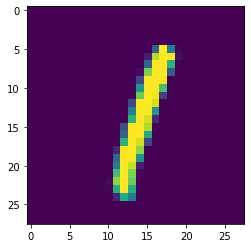

In [3]:
# Prediction
# YOUR CODE STARTS HERE
import matplotlib.pyplot as plt
import numpy as np

test_images_reshaped = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

prediction = model.predict(test_images_reshaped)
index = 5
print("Prediction :", np.argmax(prediction[index]))
print("True Label: ", test_labels[index])
plt.imshow(test_images[index])
# YOUR CODE ENDS HERE